<a href="https://colab.research.google.com/github/AadithS13/Data-Science/blob/main/Joke_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df_j = pd.read_csv('/content/drive/MyDrive/Analytics Vidhya/Joke Prediction/jokes.csv')
df_t = pd.read_csv('/content/drive/MyDrive/Analytics Vidhya/Joke Prediction/train.csv')

In [4]:
df = pd.merge(df_t,df_j)

In [5]:
df.head()

,id,user_id,joke_id,Rating,joke_text
0,31030_110,31030,110,2.750,"Judy was having trouble with her computer, so ..."
1,9137_110,9137,110,1.719,"Judy was having trouble with her computer, so ..."
2,27649_110,27649,110,5.031,"Judy was having trouble with her computer, so ..."
3,35355_110,35355,110,3.031,"Judy was having trouble with her computer, so ..."
4,5478_110,5478,110,3.094,"Judy was having trouble with her computer, so ..."


In [6]:
df.shape

(1092059, 5)

In [7]:
df['joke_text'].unique().sum()

'Judy was having trouble with her computer, so she called Tony, the computer guy, over to her desk. Tony clicked a couple buttons and solved the problem. As he was walking away, Judy called after him, "So, what was wrong?" And he replied, "It was an ID Ten T Error." A puzzled expression ran riot over Judy\'s face. "An ID Ten T Error? What\'s that...in case I need to fix it again?" He gave her a grin..."Haven\'t you ever heard of an ID Ten T Error before?" "No," replied Judy. "Write it down," he said, "and I think you\'ll figure it out." (She wrote...) I D 1 0 TOne day the first grade teacher was reading the story of the Three Little Pigs to her class. She came to the part of the story where the first pig was trying to accumulate the building materials for his home. She read, "...and so the pig went up to the man with the wheelbarrow full of straw and said, \'Pardon me sir, but may I have some of that straw to build my house?\'" The teacher paused then asked the class, "And what do you 

In [8]:
df.isnull().sum()

id           0
user_id      0
joke_id      0
Rating       0
joke_text    0
dtype: int64

In [9]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR) 

user_id    20372.0
joke_id       82.0
Rating         7.5
dtype: float64


In [10]:
df1 = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [11]:
df1.shape

(1092059, 5)

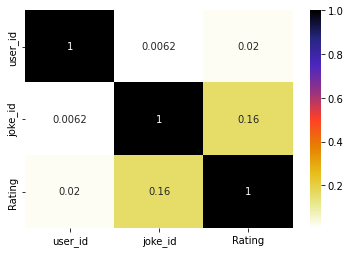

In [12]:

cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [13]:
target = df['Rating']
input = df.drop(['id','user_id','Rating'],axis=1)

In [15]:
input.head()

,joke_id,joke_text
0,110,"Judy was having trouble with her computer, so ..."
1,110,"Judy was having trouble with her computer, so ..."
2,110,"Judy was having trouble with her computer, so ..."
3,110,"Judy was having trouble with her computer, so ..."
4,110,"Judy was having trouble with her computer, so ..."


In [19]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
input['joke_text']= label_encoder.fit_transform(input['joke_text'])
input.head()

,joke_id,joke_text
0,110,76
1,110,76
2,110,76
3,110,76
4,110,76


In [20]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
model = LR.fit(input,target)

In [22]:
df_test = pd.read_csv('/content/drive/MyDrive/Analytics Vidhya/Joke Prediction/test.csv')
df_test.head()

,id,user_id,joke_id
0,6194_11,6194,11
1,19356_3,19356,3
2,23426_79,23426,79
3,40030_3,40030,3
4,19806_115,19806,115


In [23]:
input_test = df_test.drop(['id'],axis=1)
input_test.head()

,user_id,joke_id
0,6194,11
1,19356,3
2,23426,79
3,40030,3
4,19806,115


In [27]:
predicted = LR.predict(input_test)
predicted.reshape(-1,1)
predicted.astype(int)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- user_id
Feature names seen at fit time, yet now missing:
- joke_text

  warnings.warn(message, FutureWarning)


array([110, 343, 415, ...,  73, 347, 720])

In [30]:
df3_final = pd.read_excel('/content/drive/MyDrive/Analytics Vidhya/Joke Prediction/Joke_Prediction_sample.xlsx')

In [32]:
df3_final = pd.DataFrame()
df3_final['id'] = df_test['id']
df3_final['Rating'] = predicted.astype(int)
df3_final.to_csv('/content/drive/MyDrive/Analytics Vidhya/Joke Prediction/Joke_Prediction_sample.xlsx', header='id')